<a href="https://colab.research.google.com/github/jelade/AMMI_PROJECT1_G8/blob/main/task1_multiomics_Jaleel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiomics modeling

Let's look at the paper *"Multiomics modeling of the immunome, transcriptome, microbiome, proteome and metabolome adaptations during human pregnancy"* by **Ghaemi et al. 2019** (`task1_multiomics_ghaemi2019multiomics.pdf`).
The idea is to use different modalities (measurements collected from the immune system, microbiome, etc.) to characterize biological changes during pregnancy. 
This includes whether we can predict the gestational age of a mother solely based on the collected biomarkers.

**Note**: There is no need to get accquainted with multiomics modeling, at least for this exercise. In the end, this is just a regular data science task :) 

## Load the data

Load the data from `multiomics_data.pickle` using `pickle`. You will get a [pandas](https://pandas.pydata.org/docs/user_guide/10min.html) DataFrame containing preprocessed data from the paper (the original data from their paper is a bit messy). The data contains several meta attributes as well as the different modalities.

Meta attributes include:

* `Sex`: sex of the baby
* `timepoint`: 1-3 correspond to the three trimesters, 4 corresponds to postpartum
* `gestational_age`: time of sampling

Modalites are:
    
* `cellfree_rna`
* `metabolomics`
* `microbiome`
* `plasma_luminex`
* `serum_luminex`
* `immune_system`
* `plasma_somalogic`

For more details pleaase see the paper.

In [2]:
# code for loading the data

import numpy as np
import pickle

with open("/content/sample_data/task1_multiomics_data.pickle", "rb") as file:
    data_multiomics = pickle.load(file)
    
data_multiomics.head(5)

Training/Validation Gates ID       MRN Study Subject ID Number     Sex  \
                                                                           
0                   T  PTLG002  16661779                   10565    Male   
1                   T  PTLG002  16661779                   10565    Male   
2                   T  PTLG002  16661779                   10565    Male   
3                   T  PTLG002  16661779                   10565    Male   
4                   T  PTLG004  23587868                   10603  Female   

  sex_bin timepoint gestational_age cellfree_rna                ...  \
                                       0_C2orf76      1_ACTL10  ...   
0       1         1              11     0.312437 -1.892930e-16  ...   
1       1         2              18     0.312437 -1.892930e-16  ...   
2       1         3              32     0.312437 -1.892930e-16  ...   
3       1         4              45     0.312437 -1.892930e-16  ...   
4       0         1              11     5.204209  1.734736e+00  ...   

  plasma_somalogic                                                             \
       1290_UBE2G2 1291_TAGLN2 1292_ATP5O 1293_POMC 1294_CRYZL1 1295_SERPINF1   
0           4804.4      2233.0     3610.9     715.8       151.4       37885.8   
1           4086.0      2160.5     2260.4     825.2       161.0       41821.5   
2           4328.0      1818.4     2445.2    1241.8       194.6       45526.1   
3           3442.4      2661.4     3879.2     703.6       153.7       36862.5   
4           4261.9      1804.6     1470.6     526.8       163.0       38938.3   

                                              
  1296_CTSF 1297_FTCD 1298_USP25 1299_PLXNB2  
0    1479.1    3261.8      561.3      3227.0  
1    1465.1    1839.8      597.8      3366.0  
2    1428.3    3057.2      625.7      8703.7  
3    1063.6    7339.7      593.2      2918.9  
4    1170.1    1036.8      552.8      3457.1  

[5 rows x 61274 columns]

In [3]:
data_multiomics.columns



MultiIndex([(    'Training/Validation',              ''),
            (               'Gates ID',              ''),
            (                    'MRN',              ''),
            ('Study Subject ID Number',              ''),
            (                    'Sex',              ''),
            (                'sex_bin',              ''),
            (              'timepoint',              ''),
            (        'gestational_age',              ''),
            (           'cellfree_rna',     '0_C2orf76'),
            (           'cellfree_rna',      '1_ACTL10'),
            ...
            (       'plasma_somalogic',   '1290_UBE2G2'),
            (       'plasma_somalogic',   '1291_TAGLN2'),
            (       'plasma_somalogic',    '1292_ATP5O'),
            (       'plasma_somalogic',     '1293_POMC'),
            (       'plasma_somalogic',   '1294_CRYZL1'),
            (       'plasma_somalogic', '1295_SERPINF1'),
            (       'plasma_somalogic',     '1296_CTSF')

In [4]:
#Creating new dataframe for each modalities
immune_system_df = data_multiomics["immune_system"]
cellfree_rna_df = data_multiomics["cellfree_rna"]
metabolomics_df = data_multiomics["metabolomics"]
microbiome_df = data_multiomics["microbiome"]
plasma_luminex_df = data_multiomics["plasma_luminex"]
serum_luminex_df = data_multiomics["serum_luminex"]
plasma_somalogic_df = data_multiomics["plasma_somalogic"]
plasma_luminex_df.head()

,0_plasma-IL17F,1_plasma-FASL,2_plasma-TGFA,3_plasma-MIP1A,4_plasma-SDF1A,5_plasma-IL27,6_plasma-LIF,7_plasma-IL1B,8_plasma-IL2,9_plasma-IL4,...,52_plasma-ICAM1,53_plasma-VCAM1,54_plasma-FGFB,55_plasma-IL22,56_plasma-PDGFBB,57_plasma-VEGF,58_plasma-LEPTIN,59_plasma-PAI1,60_plasma-CD40L,61_plasma-ENA78
0,59.00,82.0,27.75,46.00,191.25,70.50,35.50,28.00,31.0,56.50,...,1578.50,15781.00,50.50,43.00,62.5,164.0,1533.50,3707.50,115.75,213.50
1,63.00,83.5,31.50,53.00,186.75,67.75,36.00,28.00,31.0,58.75,...,1669.00,15689.50,57.00,34.75,63.5,168.5,2145.75,5077.75,120.50,182.50
2,72.75,108.0,123.25,67.00,203.75,86.25,41.75,39.00,50.0,68.50,...,1399.50,14570.75,75.75,51.75,143.0,214.0,763.50,4713.50,104.75,355.50
3,90.75,451.0,184.50,104.75,370.50,294.50,41.00,36.50,47.5,195.25,...,1725.75,14487.75,213.25,79.00,618.0,509.0,380.25,3957.25,179.00,467.25
4,686.50,1088.5,453.75,252.25,575.50,1028.50,232.00,58.25,147.5,605.00,...,2055.00,15889.00,565.50,144.75,1145.5,845.0,2001.50,3481.25,2731.75,724.25


## Task 1: Your experience

Before we start, please briefly describe your experience in data science and machine learning (5 sentences).

### I have a bachelors in statistics and masters in  mathematical sciences. During my bachelors and masters, I took courses in computational statistics, data science and machine learning. I have done some that science projects. I have also participated in data science competition. I have more than 3 years experience in analysis of health data.

## Task 2: Reproduce Figure 1

In [5]:
import matplotlib.pyplot as plt #Importing visualization library
import seaborn as sns

colors = sns.color_palette("bright")


In [6]:
#Perfoming PCA to get numbers of components

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd



label_list = ["Cellfree RNA", "Plasma Luminex", "Serum Luminex","Microbiome","Immune System", "Metabolomics", "Plasma Somalogic"]

data_list = [cellfree_rna_df, plasma_luminex_df, serum_luminex_df,microbiome_df,immune_system_df, metabolomics_df, plasma_somalogic_df]

def PPCA(data,label):
    dic = {}
    for i in range(len(data)):
        immune = data[i].values

        scaler = StandardScaler()
        scaler.fit(immune)
        immune_scale = scaler.transform(immune)

        immune_system_PCA = PCA(0.9)
        immune_system_PCA.fit_transform(immune_scale)
#explained_var_ratio_fac = pd.DataFrame(np.reshape([immune_system_PCA.explained_variance_ratio_,np.cumsum(immune_system_PCA.explained_variance_ratio_)],(68,2)), columns =['Explained_var','Cummulative'])
#print(immune_system_PCA.explained_variance_ratio_)

        number_of_components = len(np.cumsum(immune_system_PCA.explained_variance_ratio_))
        dic[label[i]] = number_of_components
    return dic

components = PPCA(data_list, label_list)

components

{'Cellfree RNA': 46,
 'Plasma Luminex': 10,
 'Serum Luminex': 9,
 'Microbiome': 8,
 'Immune System': 22,
 'Metabolomics': 14,
 'Plasma Somalogic': 27}

Text(0, 0.5, 'Number of PCs for 90% Variance')

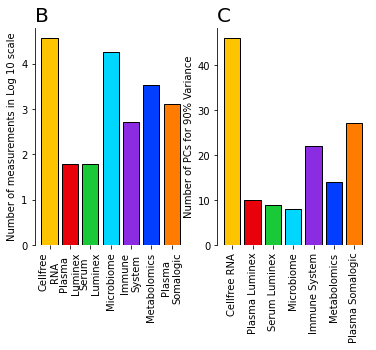

In [7]:
#Creating label for the plots
label = ["Cellfree\nRNA", "Plasma\nLuminex", "Serum\nLuminex","Microbiome","Immune\nSystem", "Metabolomics", "Plasma\nSomalogic"]
#The list of measure
Number_of_measurement = [37375,62,62,18548,534,3485,1300]


# Getting name and value from the PCs dictionary
names = list(components.keys())
values = list(components.values())

#Plotting
fig = plt.figure()


plt.subplot(1,2,1)
#First plot for the measures
plt.bar(label, np.log10(Number_of_measurement), color = [colors[8],colors[3],colors[2],colors[9],colors[4],colors[0],colors[1]],edgecolor='black')
sns.despine(bottom=True)
plt.xticks(rotation=90)
plt.title("B", fontsize= 20,loc='left')
plt.ylabel("Number of measurements in Log 10 scale")

#Second plot for the PCs for 90% variance
plt.subplot(1,2,2)
plt.bar(range(len(names)), values, tick_label=names,color = [colors[8],colors[3],colors[2],colors[9],colors[4],colors[0],colors[1]],edgecolor='black')

sns.despine(bottom=True)
plt.xticks(rotation=90)

plt.title("C", fontsize= 20,loc='left')
plt.ylabel("Number of PCs for 90% Variance")

1. Reproduce **Figure 1 B and C** from the paper.
2. Explain in a few words why this analyhsis was conducted, and what the authors want to tell the reader with the results.

### Answer


** The authors wanted to show the readers with figure B to know the modalities with the highest number of measures. This is the reason this analysis was conducted

** Also, the figure C, the author wants to show the reader the modality which have the highest number of correlated measure and the modality with the lowest. The modality with many correlated features have the smallest bar.

** Also, this is to show the reader that the modalities measure are different from the other.

**Figure 1:**<br/>
<img src="assets/task1_multiomics_fig1.jpeg">

## Task 3: Build a prediction model for `gestational_age`

1. Pick **two modalities** and train two models to predict `gestational_age` **for each of them** (the original paper built models for all seven of them and combined them as well; you don't need to do that).
This should result in four trained models.
For example, one trained model could based on `linear regression` as a model, the `immune_system` data as input, and `gestational_age` as output.

2. **Evaluate** your models using a measure that you think fits best and **visualize** your predictions similar to **Figure 5**.

3. For your best model, **plot a figure** similar to **Figure 2D**.

4. **Briefly explain** your choices and discuss the results (particularly if your approach or your results differ from the paper).

To train and evaluate models, you can use [scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html).

# Answer

1. I choose to use random forest model for this because it is best when the data have fewer observation compare to the number of features. Also, Random forest regressors are particularly well-suited to handling high-dimensional data because they use an ensemble of decision trees, each of which is trained on a random subset of the features.


2. I choose XGBoost because it can handle high-dimensional data with a large number of features. This data set have a very large number of features for each modalities.



#### Result

From the results, XGBoost performed better than Random Forest on the two datasets, which is displayed in the performance plot. R-squared and Mean squared Error were used to evaluate the model because its a prediction task.




Prediction Score:  0.39342503232175063
Mean Absolute Error: 8.980618950711746
Mean Squared Error: 108.44074932370337
Root Mean Squared Error: 10.413488816131862


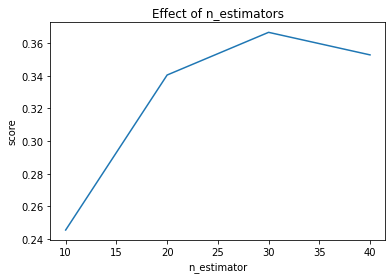

In [8]:
#Importing the needed library

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



#Targeted value
y = data_multiomics["gestational_age"]


#I choose serum liminex and plama semalogic
X_serum  = serum_luminex_df
X_plasma = plasma_somalogic_df


#Dividing data into training and test set

X_train_serum, X_test_serum, y_train_serum, y_test_serum = train_test_split(X_serum, y, test_size=0.1, random_state=36)

# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train_serum)
scaler.fit(X_test_serum)
X_train_serum = scaler.transform(X_train_serum)
X_test_serum= scaler.transform(X_test_serum)

#Fitting a Random Forest Regressor
regr_serum = RandomForestRegressor(n_estimators=33, max_depth=2, random_state=0)
regr_serum.fit(X_train_serum, y_train_serum)

y_pred_serumR = regr_serum.predict(X_test_serum)

print("Prediction Score: ", regr_serum.score(X_test_serum, y_test_serum))

# Evaluating the Algorithm

mae_serumR= metrics.mean_absolute_error(y_test_serum, y_pred_serumR)
mse_serumR = metrics.mean_squared_error(y_test_serum, y_pred_serumR)
rmse_serumR = np.sqrt(metrics.mean_squared_error(y_test_serum, y_pred_serumR))

print('Mean Absolute Error:', mae_serumR)  
print('Mean Squared Error:', mse_serumR)  
print('Root Mean Squared Error:', rmse_serumR )



#Checking for the best number estimator

estimators = np.arange(10, 50, 10)
scores = []
for n in estimators:
    regr_serum.set_params(n_estimators=n)
    regr_serum.fit(X_train_serum, y_train_serum)
    scores.append(regr_serum.score(X_test_serum, y_test_serum))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)


In [10]:
#Divinding the data to train and test data
X_train_plasma, X_test_plasma, y_train_plasma, y_test_plasma = train_test_split(X_plasma, y, test_size=0.1, random_state=36)
#Fitting random forest regression
regr_plasma = RandomForestRegressor(n_estimators = 40,random_state=0,criterion='squared_error', min_samples_leaf=3, min_samples_split=3, max_depth=10)
regr_plasma.fit(X_train_plasma,y_train_plasma)

y_pred_plasma = regr_plasma.predict(X_test_plasma)

# Evaluating the Algorithm


# Evaluating the Algorithm

mae_plasmaR= metrics.mean_absolute_error(y_test_plasma, y_pred_plasma)
mse_plasmaR = metrics.mean_squared_error(y_test_plasma, y_pred_plasma)
rmse_plasmaR = np.sqrt(metrics.mean_squared_error(y_test_plasma, y_pred_plasma))
score_plasmaR = metrics.r2_score(y_test_plasma, y_pred_plasma)

print('Mean Absolute Error:', mae_plasmaR)  
print('Mean Squared Error:', mse_plasmaR)  
print('Root Mean Squared Error:', rmse_plasmaR )
print("Accuracy score: ", score_plasmaR )



Mean Absolute Error: 3.232671098742526
Mean Squared Error: 17.38271295106383
Root Mean Squared Error: 4.169258081609224
Accuracy score:  0.9027679298399398


In [11]:
# create an xgboost regression model
model_serumX = XGBRegressor()
model_serumX.fit(X_train_serum, y_train_serum)

# Evaluating the Algorithm
y_pred_serumX = model_serumX.predict(X_test_serum)


mae_serumX= metrics.mean_absolute_error(y_test_serum, y_pred_serumX)
mse_serumX = metrics.mean_squared_error(y_test_serum, y_pred_serumX)
rmse_serumX = np.sqrt(metrics.mean_squared_error(y_test_serum, y_pred_serumX))
scores_serumX = model_serumX.score(X_test_serum, y_test_serum)

print('Mean Absolute Error:', mae_serumX)  
print('Mean Squared Error:', mse_serumX)  
print('Root Mean Squared Error:', rmse_serumX)
print("Scores: ", scores_serumX)


Mean Absolute Error: 6.822690282549177
Mean Squared Error: 58.8106475373405
Root Mean Squared Error: 7.6688100470242775
Scores:  0.6710363322683008
[15.105675  19.615635  13.7886915 19.14576   34.77926   41.149208
 20.11179  ]


In [12]:
# create an xgboost regression model for plasma
model2 = XGBRegressor()
model2.fit(X_train_plasma, y_train_plasma)



y_pred_plasmaX = model2.predict(X_test_plasma)


mae_plasmaX= metrics.mean_absolute_error(y_test_plasma, y_pred_plasmaX)
mse_plasmaX = metrics.mean_squared_error(y_test_plasma, y_pred_plasmaX)
rmse_plasmaX = np.sqrt(metrics.mean_squared_error(y_test_plasma, y_pred_plasmaX))
score_plasmaX = metrics.r2_score(y_test_plasma, y_pred_plasmaX)

print('Mean Absolute Error:', mae_plasmaX)  
print('Mean Squared Error:', mse_plasmaX)  
print('Root Mean Squared Error:', rmse_plasmaX )
print("Accuracy score: ", score_plasmaX )






Mean Absolute Error: 1.4551293509347099
Mean Squared Error: 2.5138696704088943
Root Mean Squared Error: 1.58551873858649
Accuracy score:  0.9859384002454297


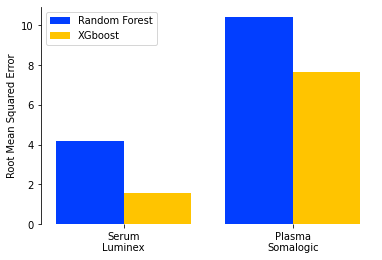

In [13]:
#Comaparing the models using bar plots

rmse_R = [rmse_plasmaR,rmse_serumR]
rmse_X = [rmse_plasmaX,rmse_serumX]

label = ["Serum\nLuminex", "Plasma\nSomalogic"]

  
X_axis = np.arange(len(rmse_R))
  
plt.bar(X_axis - 0.2, rmse_R, 0.4, label = "Random Forest",color = colors[0])
plt.bar(X_axis + 0.2, rmse_X, 0.4, label = "XGboost", color = colors[8])
  
plt.xticks(X_axis, label)
plt.ylabel("Root Mean Squared Error")
sns.despine(bottom=True)
plt.legend()
plt.show()

#### It can be seen that XGBOOST PERFORMED BETTER THAN RANDOM FOREST WITH SMALLER RMSE.

**Figure 5:**<br/>
<img src="assets/task1_multiomics_fig5_min.jpeg">

**Figure 2D:**<br/>
<img src="assets/task1_multiomics_fig2d.jpeg">

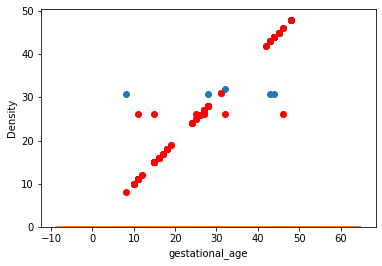

In [20]:

y_pred_serumX = model_serumX.predict(X_train_serum)

y_pred_plasmaX = model2.predict(X_train_plasma)

y_ave_plasma = (y_train_plasma+y_pred_plasmaX)/2
y_ave_serum = (y_train_serum+y_pred_serumX)/2

plt.scatter(y_train_plasma,y_pred_plasmaX)
plt.scatter(y_train_serum,y_pred_serumX, color = "r")
sns.kdeplot(data=y_ave_plasma)
sns.kdeplot(data=y_ave_serum)
plt.ylim( 0)
plt.show()

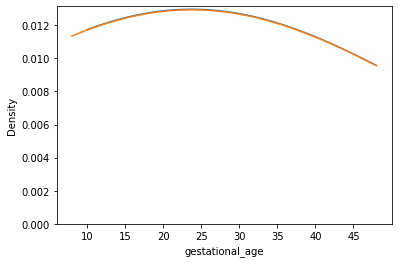

In [21]:
sns.kdeplot(data=y_ave_plasma,bw_adjust=5, cut=0)
sns.kdeplot(data=y_ave_serum,bw_adjust=5, cut=0)
plt.ylim(0.005)
plt.ylim(0)
plt.show()

## Task 4: Predicting the sex of the baby using neural networks

1. Try using a neural network in Tensorflow or PyTorch for the previous predicion task. 
2. Perform hypterparameter optimization.
3. Discuss your choices in designing and optimizing the neural network.
4. Discuss why a neural network may be better/worse than applying a regular model (e.g., linear regression or a random forest).

Neural networks may not always be better than regular models when the number of observations is less than the number of features. In fact, when the number of observations is small relative to the number of features, traditional models such as linear regression or decision trees may be more appropriate.

Neural networks does not perform always better than the regular models expecially when the number of features is larger than teh number of observation because it requires a large number of training data to effectively learn the underlying patterns in the data.

On the other hand, traditional models such as linear regression or decision trees are less prone to overfitting and may perform better when the number of observations is small relative to the number of features.

In [ ]:
y = data_multiomics["Sex"]#assigning target variable to sex


#Divinding the data to train and test data
X_train_plasma, X_test_plasma, y_train_plasma, y_test_plasma = train_test_split(X_plasma, y, test_size=0.1, random_state=36)
X_train_serum, X_test_serum, y_train_serum, y_test_serum = train_test_split(X_serum, y, test_size=0.1, random_state=36)

In [17]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(68,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [19]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model(optimizer = 'adam'):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=[1300]),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [10, 20],
    'optimizer': ['adam', 'sgd']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_plasma, y_train_plasma)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

<ipython-input-19-b8a26326da3a>:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best: 0.127778 using {'batch_size': 16, 'epochs': 10, 'optimizer': 'adam'}


In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model(optimizer = 'adam'):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=[62]),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [10, 20],
    'optimizer': ['adam', 'sgd']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_serum, y_train_serum)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

#### Choices in designing and optimizing the neural network:

In designing the neural network, I chose to use two hidden layers with 64 and 32 neurons respectively, which is a common architecture for binary classification problems. I also used the ReLU activation function for the hidden layers and sigmoid for the output layer. For optimizing the neural network, I used the Adam optimizer and binary cross-entropy loss function, which are also commonly used for binary classification problems.
In optimizing the neural network, I used GridSearchCV to search over different hyperparameters like batch size, number of epochs, and optimizer. I chose to search over a small set of hyperparameters to keep the computation time reasonable, but in practice, you can search over a larger set of hyperparameters to get better performance.

## Task 5: Feedback

Were the tasks above difficult, easy, or a mixture? In both cases, briefly describe why.

The task was mixture for me personal expecially the plot that I could not get. Even though I started the task yesterday which is not an excuse for me. 